### 根据land_mark计算heatmap

In [53]:
import cv2
import csv
import math
path="D:/Project/Xiehe_Spinal_image_stitching/cobb/ke30_u7_AASCE2019-master/boostnet_labeldata"
landmarks = csv.reader(open(path + "/labels/test/landmarks.csv", 'r'))
names= csv.reader(open(path + "/labels/test/filenames.csv", 'r'))
image_path = path + "/data/test/"

# landmarks =  csv.reader(open(r"D:\Project\Xiehe_Spinal_image_stitching\cobb\labeled_spine\landmarks_test.csv", 'r'))
# names = csv.reader(open(r"D:\Project\Xiehe_Spinal_image_stitching\cobb\labeled_spine\filenames_test.csv", 'r'))
# image_path = r"D:\Project\Xiehe_Spinal_image_stitching\cobb\Full_length_img\test/"

names=list(names)
names=[image_path+n[0] for n in names]
labels=[]
# labels_csv=list(landmarks)
for landmark_each_image in landmarks:#地标
    coordinate_list = []
    for coordinate in landmark_each_image:
        coordinate_list.append(float(coordinate))
        # print(coordinate_list)
    labels.append(coordinate_list)
    



### 生成高斯关键点热力图

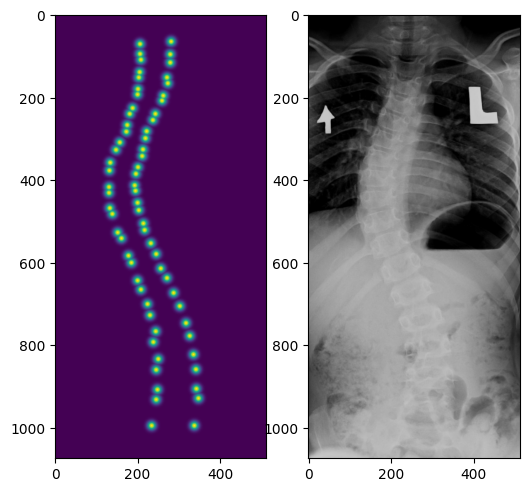

In [55]:
import numpy as np
import matplotlib.pyplot as plt
 
 
def CenterLabelHeatMap(img_width, img_height, c_x, c_y, sigma):
    X1 = np.linspace(1, img_width, img_width)
    Y1 = np.linspace(1, img_height, img_height)
    [X, Y] = np.meshgrid(X1, Y1)
    X = X - c_x
    Y = Y - c_y
    D2 = X * X + Y * Y
    E2 = 2.0 * sigma * sigma
    Exponent = D2 / E2
    heatmap = np.exp(-Exponent)
    return heatmap
def generate_multi_keypoint_heatmaps(img_width, img_height, p, sigma):
    """
    为多个关键点生成合并后的热图
    :param img_width: 图像宽度
    :param img_height: 图像高度
    :param keypoints: 包含多个关键点的坐标列表，每个关键点是 (x, y) 坐标
    :param sigma: 高斯热图的标准差
    :return: 合并后的热图
    """
    # 初始化一个全零的热图
    final_heatmap = np.zeros((img_height, img_width), dtype=np.float32)
    num_p=len(p)//2
    # 为每个关键点生成热图，并累加到final_heatmap
    for i in range(num_p):
        c_x,c_y=int(p[i]*width),int(p[i+num_p]*height)
        
        heatmap = CenterLabelHeatMap(img_width, img_height, c_x, c_y, sigma)
        final_heatmap = np.maximum(final_heatmap, heatmap)  # 选择每个位置的最大值

    return final_heatmap 
Heatmap_path=r'D:\Project\Xiehe_Spinal_image_stitching\cobb\codes\Heatmaps\test/'
# for idx in range(len(labels)):
idx = 4
img=cv2.imread(names[idx])

img=cv2.resize(img,(512,int(img.shape[0]/img.shape[1]*512)))#宽为512
# print(img.shape)
num_p=len(labels[idx])//2
p=labels[idx]
# for j in range(68):
#         cv2.circle(img_c,(int(p[j]*w),int(p[j+num_p]*h)),3,(255,255,0))

img = img[:,:,::-1]

height, width, _ = img.shape

heatmap1 = generate_multi_keypoint_heatmaps(width, height, p, 7)
img_prefix=names[idx].split('/')[-1]
# heatmap1 = cv2.resize(heatmap1, (img.shape[1]//4, img.shape[0]//4),interpolation=cv2.INTER_NEAREST)
# cv2.imwrite(Heatmap_path+img_prefix,255*heatmap1)
#     break
fig = plt.figure(figsize=(6,8))
plt.subplot(1,2,1)
plt.imshow(heatmap1)
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

# print('End.')

n: 9
m: 13
k: 3


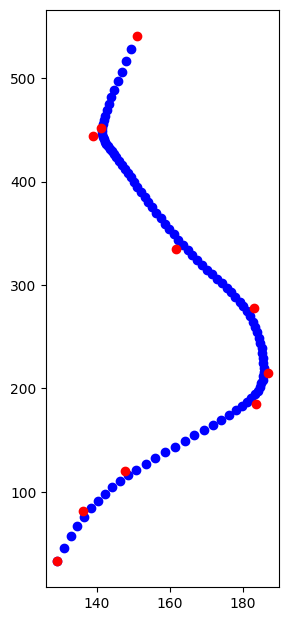

In [32]:
from B_spline2 import getBt, getPt

useReg=False

controlPoints=cp.copy()
controlPoints[:,0]=cp[:,1]
controlPoints[:,1]=cp[:,0]
knots = np.array([0,0,0,0,1/9,2/9,3/9,4/9,5/9,7/9,1,1,1,1])
# knots=np.array([1/13,2/13,3/13,4/13,5/13,6/13,7/13,8/13,9/13,10/13,11/13,12/13,1])
m = knots.shape[0]-1
n = controlPoints.shape[0]-1
k = m - n - 1
print('n:',n)
print('m:',m)
print('k:',k)
fig = plt.figure(figsize=(3,7.5))
ax = fig.add_subplot(111)
for t in np.linspace(0,1,100):
    if useReg and not(t >= knots[k] and t<= knots[n+1]):
        continue
    Bt = getBt(controlPoints, knots, t)
    Pt = getPt(Bt[k, :n+1], controlPoints)
    if(Pt[0]==0): break
    ax .scatter(Pt[0],Pt[1],color='b')
ax.scatter(controlPoints[:,0], controlPoints[:,1],color = 'r')
plt.show()

[[ 27.         107.5       ]
 [ 50.58504905 107.56696852]
 [ 75.81451885 101.52221105]
 [117.30582414  84.50195894]
 [148.97968739  71.35648176]
 [182.13488229  63.44922902]
 [218.97835658  67.80286146]
 [256.33042204  85.18051613]
 [315.37865491 118.4855406 ]
 [348.00273091 137.14487441]
 [383.5        139.5       ]]
